In [42]:
import numpy as np
import pandas as pd


In [43]:
df1=pd.read_csv('book3.csv')

In [44]:
df1.head()


,Alcohol,malic acid,ash,Alcalinity of ash,Magnesium,total phenol,flevanoid,non flevanoiod phenol,Proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,Proline,acetelyne
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
%matplotlib inline


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'malic acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'total phenol'}>,
        <Axes: title={'center': 'flevanoid'}>,
        <Axes: title={'center': 'non flevanoiod phenol'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'color intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'acetelyne'}>, <Axes: >, <Axes: >]],
      dtype=object)

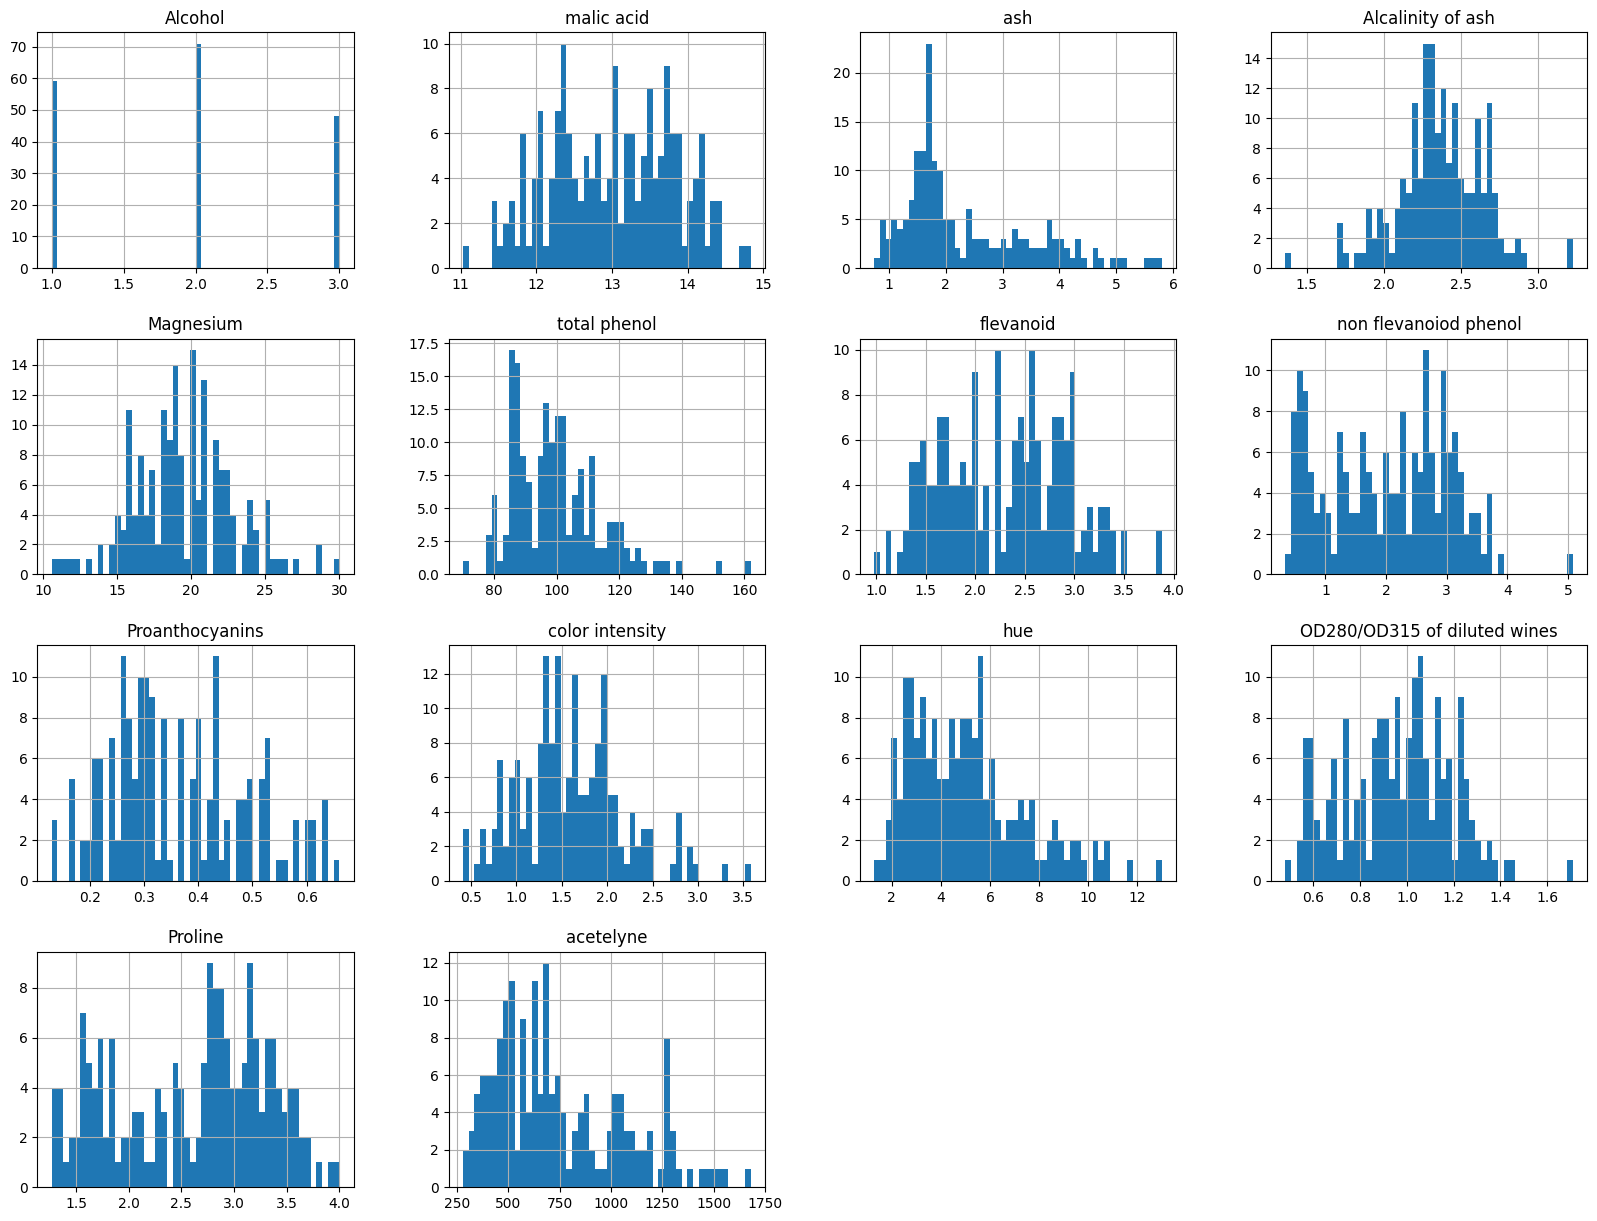

In [46]:
df1.hist(bins=50,figsize=(20,15))

In [47]:
from pandas.plotting import scatter_matrix


In [48]:
attributes=["Proline","acetelyne","malic acid"]

array([[<Axes: xlabel='Proline', ylabel='Proline'>,
        <Axes: xlabel='acetelyne', ylabel='Proline'>,
        <Axes: xlabel='malic acid', ylabel='Proline'>],
       [<Axes: xlabel='Proline', ylabel='acetelyne'>,
        <Axes: xlabel='acetelyne', ylabel='acetelyne'>,
        <Axes: xlabel='malic acid', ylabel='acetelyne'>],
       [<Axes: xlabel='Proline', ylabel='malic acid'>,
        <Axes: xlabel='acetelyne', ylabel='malic acid'>,
        <Axes: xlabel='malic acid', ylabel='malic acid'>]], dtype=object)

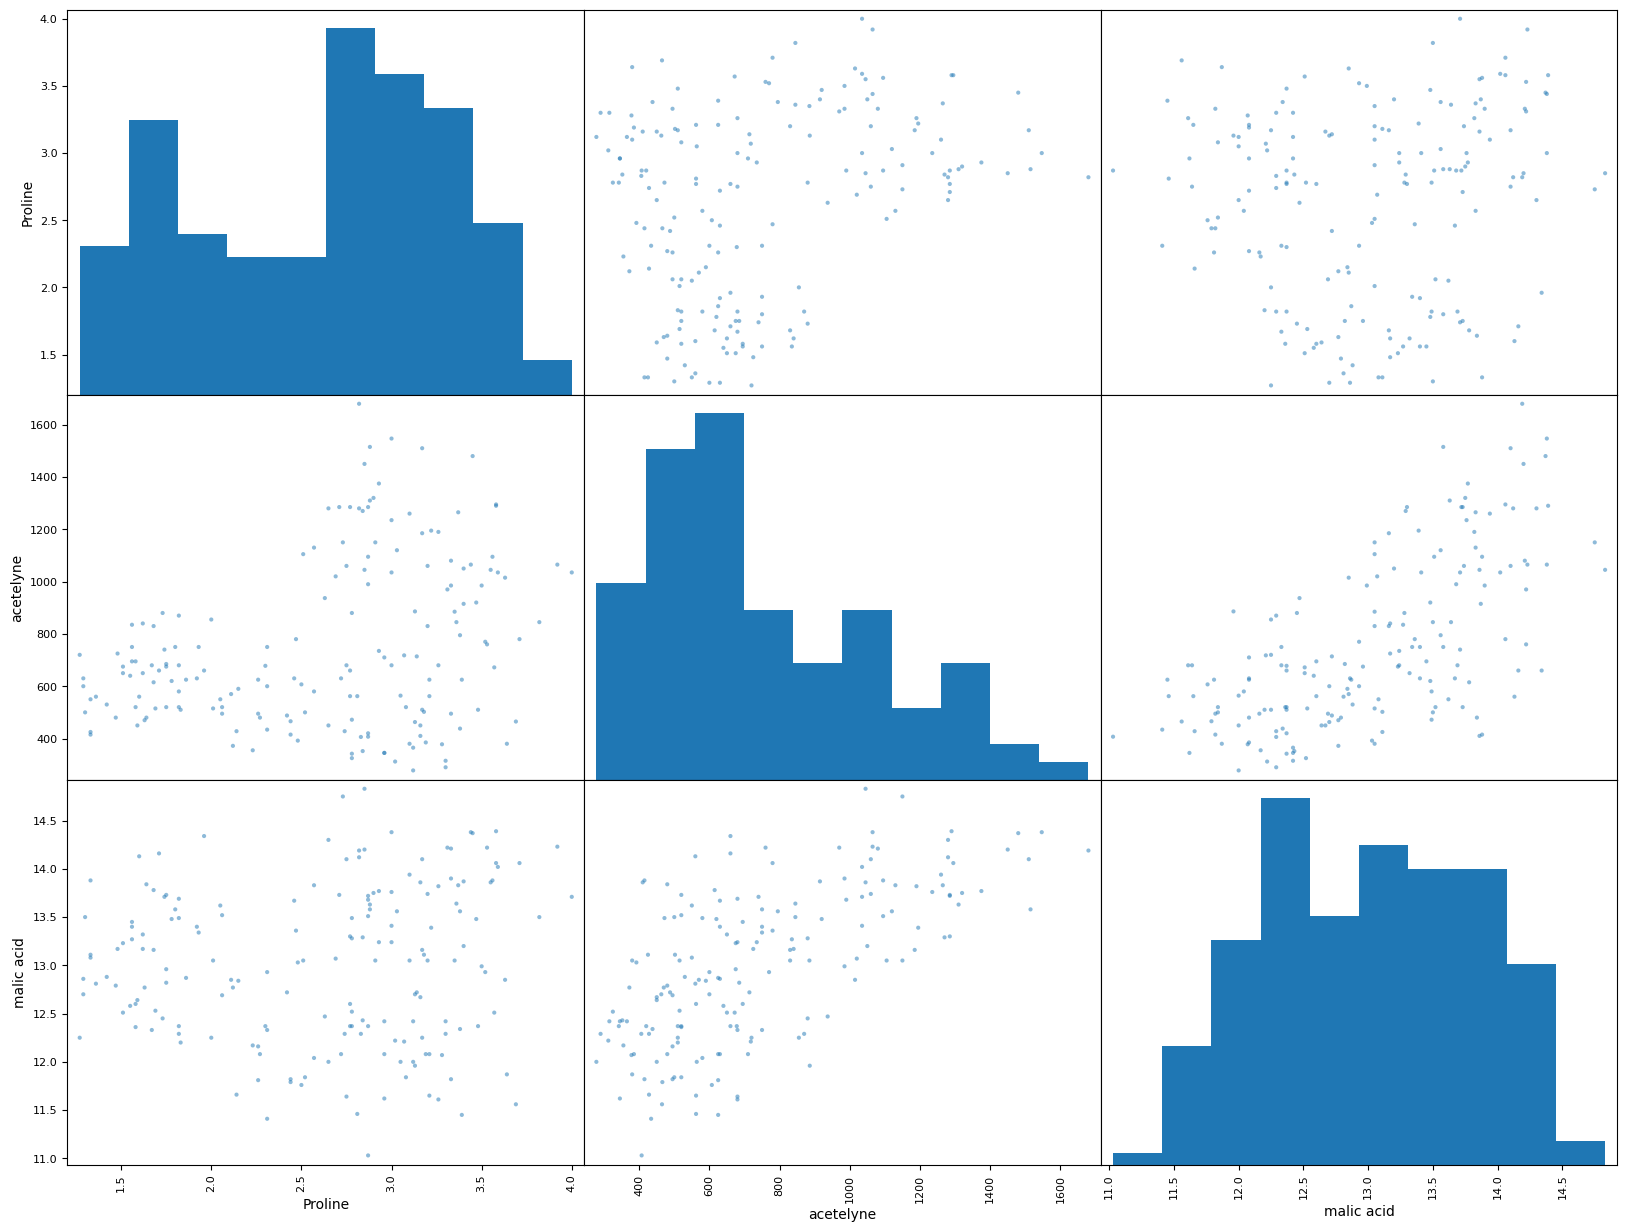

In [49]:
scatter_matrix(df1[attributes],figsize=(20,15))

<Axes: xlabel='malic acid', ylabel='acetelyne'>

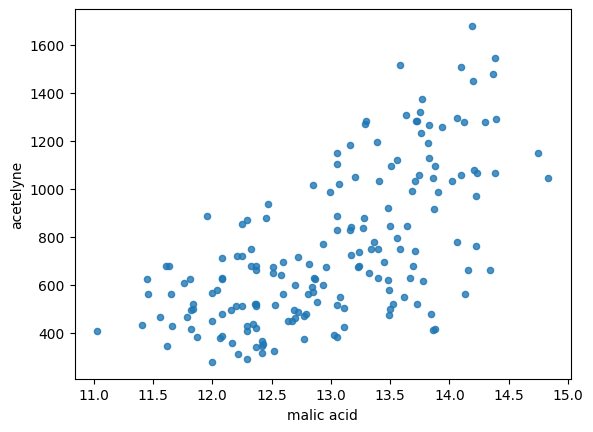

In [50]:
df1.plot(kind='scatter',x='malic acid',y='acetelyne',alpha=0.8)

In [51]:
corr_matrix=df1.corr()
corr_matrix['malic acid'].sort_values(ascending=False)


malic acid                      1.000000
acetelyne                       0.643720
hue                             0.546364
flevanoid                       0.289101
total phenol                    0.270798
non flevanoiod phenol           0.236815
Alcalinity of ash               0.211545
color intensity                 0.136698
ash                             0.094397
Proline                         0.072343
OD280/OD315 of diluted wines   -0.071747
Proanthocyanins                -0.155929
Magnesium                      -0.310235
Alcohol                        -0.328222
Name: malic acid, dtype: float64

<Axes: xlabel='malic acid', ylabel='hue'>

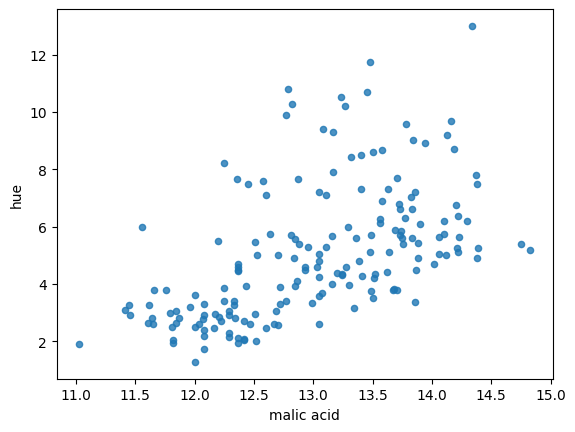

In [52]:
df1.plot(kind='scatter',x='malic acid',y='hue',alpha=0.8)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:

train_set,test_set=train_test_split(df1,test_size=0.2,random_state=42)

In [55]:
print(f"rows in train_set: {len(train_set)}\nrows in test_set: {len(test_set)}")

rows in train_set: 142
rows in test_set: 36


In [56]:
df1['Alcohol'].value_counts()

Alcohol
2    71
1    59
3    48
Name: count, dtype: int64

In [65]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df1,df1['Alcohol']):
    strat_train_set=df1.loc[train_index]
    strat_test_set=df1.loc[test_index]

In [67]:
strat_train_set

,Alcohol,malic acid,ash,Alcalinity of ash,Magnesium,total phenol,flevanoid,non flevanoiod phenol,Proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,Proline,acetelyne
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
26,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.80,0.92,3.22,1195
12,1,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
148,3,13.32,3.24,2.38,21.5,92,1.93,0.76,0.45,1.25,8.42,0.55,1.62,650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,3,13.52,3.17,2.72,23.5,97,1.55,0.52,0.50,0.55,4.35,0.89,2.06,520
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
34,1,13.51,1.80,2.65,19.0,110,2.35,2.53,0.29,1.54,4.20,1.10,2.87,1095
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675


In [68]:
strat_test_set

,Alcohol,malic acid,ash,Alcalinity of ash,Magnesium,total phenol,flevanoid,non flevanoiod phenol,Proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,Proline,acetelyne
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
134,3,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
28,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
62,2,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
51,1,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
129,2,12.04,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


## we are taking malic acid as target

<Axes: xlabel='flevanoid', ylabel='malic acid'>

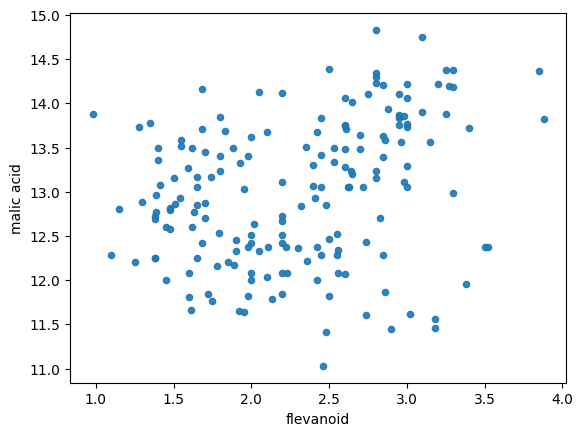

In [75]:
df1.plot(kind='scatter',x='flevanoid',y='malic acid',alpha=0.9)

## pipeline creation

In [76]:
df1=strat_train_set.drop('malic acid',axis=1)

In [77]:
df1_labels=strat_train_set['malic acid'].copy()

In [78]:
df1

,Alcohol,ash,Alcalinity of ash,Magnesium,total phenol,flevanoid,non flevanoiod phenol,Proanthocyanins,color intensity,hue,OD280/OD315 of diluted wines,Proline,acetelyne
10,1,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510
134,3,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.45,0.75,1.51,650
28,1,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915
121,2,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
62,2,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630
51,1,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265
7,1,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
66,2,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.12,3.18,502
129,2,4.30,2.38,22.0,80,2.10,1.75,0.42,1.35,2.60,0.79,2.57,580
166,3,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695


In [79]:
df1_labels

36     13.28
30     13.73
26     13.39
12     13.75
148    13.32
       ...  
142    13.52
87     11.65
34     13.51
163    12.96
131    12.88
Name: malic acid, Length: 142, dtype: float64

In [85]:
from sklearn.pipeline import Pipeline

In [87]:
from sklearn.preprocessing import StandardScaler

In [90]:
my_pipeline=([
    ('std_scaler',StandardScaler()),
])

In [98]:
df1_tr=my_pipeline.fit_transform(df1)

AttributeError: 'list' object has no attribute 'fit_transform'

In [100]:
from sklearn.tree import DecisionTreeRegressor

In [102]:
model=DecisionTreeRegressor()

In [103]:
model.fit(df1,df1_labels)

ValueError: Number of labels=142 does not match number of samples=36

In [ ]:
some_data=df1.iloc[:5]
some_labels=df1.iloc[:5]
preparede_data=my_pipeline.transform(some_data)
model.predict(prepared_data)
from sklearn.model_slelctionm import Cross_Val_Score
score=Cross_Val_Score(model,df1,df1_labels,cv=10)
def print_score(score):
    print("score:",score)
    print("standardeviation",score.std())
    import numpyn as np
    form joblib import dump,load
    model=load('dragon.joblib')